In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fontda

In [28]:
#네이버 트렌드 검색량 추출
serch='검색어.xlsx' #출처 네이버트렌드 검색량 변화 데이터
df=pd.read_excel(serch,header=6,index_col=0)
serchdf=df.iloc[::,0::2]
sumlist=[]
for n in serchdf.index:
    sumlist.append(serchdf.loc[n].sum())
# sumlist
sum2016=int(sum(sumlist[:6])) #2016년 합계 6개월
sum2017=int(sum(sumlist[6:18])) #2017년 합계 1년
sum2018=int(sum(sumlist[18:30])) #2018년 합계
sum2019=int(sum(sumlist[30:42])) #2019년 합계
sum2020=int(sum(sumlist[42:54])) #2020년 합계
sum2021=int(sum(sumlist[54:66])) #2021년 합계
sum2022=int(sum(sumlist[66:78])) #2022년 합계
sum2023=int(sum(sumlist[78:])) #2023년 합계 6개월

# serchdf['금일'].min() #11.89664
# serchdf['명일'].min() #29.73967
# serchdf['심심'].min() #0.81046
# serchdf['연패'].min() #0.61169
# serchdf['금일'].max() #99.13182
# serchdf['명일'].max() #100
# serchdf['심심'].max() #7.0954
# serchdf['연패'].max() #12.37625

minlist=[serchdf['금일'].min(),serchdf['명일'].min(),serchdf['심심'].min(),serchdf['연패'].min()]
maxlist=[serchdf['금일'].max(),serchdf['명일'].max(),serchdf['심심'].max(),serchdf['연패'].max()]
minmaxdf=pd.DataFrame([minlist,maxlist],index=['최소 검색','최대 검색'],columns=['금일','명일','심심','연패'])
print(minmaxdf)

perlist=[]
perlist.append(round(sum2016/sum(sumlist)*100))
perlist.append(round(sum2017/sum(sumlist)*100))
perlist.append(round(sum2018/sum(sumlist)*100))
perlist.append(round(sum2019/sum(sumlist)*100))
perlist.append(round(sum2020/sum(sumlist)*100))
perlist.append(round(sum2021/sum(sumlist)*100))
perlist.append(round(sum2022/sum(sumlist)*100))
perlist.append(round(sum2023/sum(sumlist)*100))

finalsumlist=[sum2016,sum2017,sum2018,sum2019,sum2020,sum2021,sum2022,sum2023]
# finalsumlist
sumperdf=pd.DataFrame([finalsumlist,perlist],columns=list(range(2016,2024)),index=['검색량합계','퍼센트'])
# sumperdf
sumperdf.loc[' ']="ㅤ"
sumperdf.loc['단어']=['금일','명일','심심','연패','금일','명일','심심','연패']
mx=minlist+maxlist
sumperdf.loc['최소/최대']=mx
total=0
for n in finalsumlist:
    total+=n
finalmean=total/len(finalsumlist)
pertotal=0
for n in perlist:
    pertotal+=n
permean=pertotal/len(perlist)
finalmeanlist=[finalmean,permean," "," "," "]
sumperdf['평균값']=finalmeanlist
sumperdf

             금일         명일       심심        연패
최소 검색  11.89664   29.73967  0.81046   0.61169
최대 검색  99.13182  100.00000  7.09540  12.37625


c:\Users\Administrator\anaconda3\envs\my_python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2016,2017,2018,2019,2020,2021,2022,2023,평균값
검색량합계,299,651,754,867,1080,1186,1476,833,893.25
퍼센트,4,9,11,12,15,17,21,12,12.625
,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,
단어,금일,명일,심심,연패,금일,명일,심심,연패,
최소/최대,11.89664,29.73967,0.81046,0.61169,99.13182,100.0,7.0954,12.37625,


In [29]:
# sumperdf.drop('평균값',axis=1,inplace=True)
sumperdf.drop([' ', '최소/최대'],inplace=True)

In [30]:
serch=sumperdf.iloc[0]
serch

2016       299
2017       651
2018       754
2019       867
2020      1080
2021      1186
2022      1476
2023       833
평균값     893.25
Name: 검색량합계, dtype: object

Text(2, 820, '늘어가는 검색량')

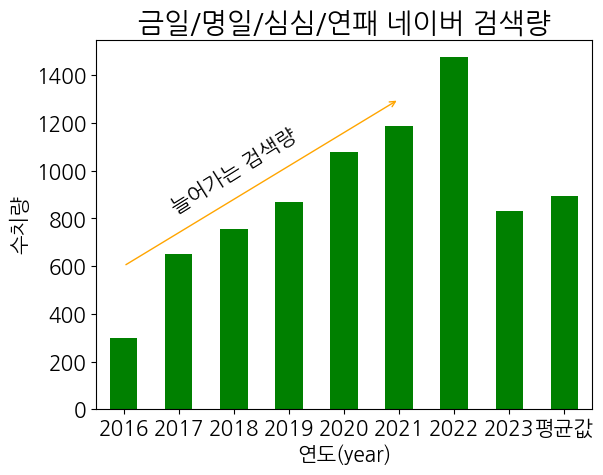

In [122]:
serch.plot(kind='bar',rot=360,xlabel="연도",ylabel="수치",fontsize=15,color='green')
plt.title("금일/명일/심심/연패 네이버 검색량",size=20)
plt.xlabel("연도(year)",size=15)
plt.ylabel("수치량",size=15)
plt.annotate("",
             xy=(5,1300), #화살표의 머리부분(끝점)
             xytext=(0,600), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='orange',lw=1)
             )
plt.annotate("늘어가는 검색량",
             xy=(2,820), #텍스트 위치 기준점
             rotation=32,
             va='baseline',
             ha='center',
             fontsize=15,                         
             )

#### 가설 : 문해능력이 사람간의 대화 즉 커뮤니케이션과 연관이 있다. 커뮤니케이션관련 데이터들을 분석해보자. 

c:\Users\Administrator\anaconda3\envs\my_python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<Axes: xlabel=' '>

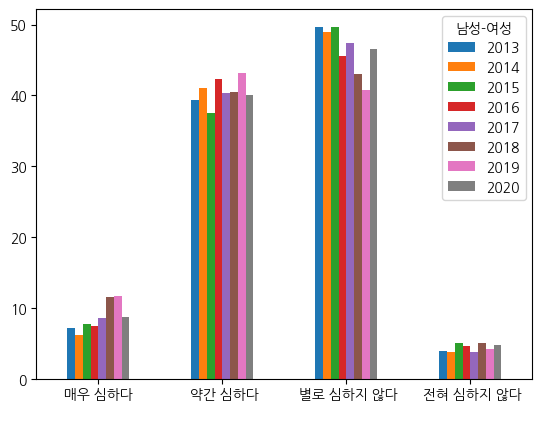

In [32]:
workdouble='맞벌이.xlsx' #출처 KOSIS 노동탭 년도별맞벌이가구
workdf=pd.read_excel(workdouble,index_col=0)
doublelist=list(workdf.loc['계'][1::5]) #2015년부터 2022년
# doublelist
gender='젠더갈등.xlsx'
genderdf=pd.read_excel(gender,header=3,index_col=0)
genderdf=genderdf.iloc[:-1].T
genderdf.plot(kind="bar",rot=360,xlabel=" ")

In [33]:
genderdf

남성-여성,2013,2014,2015,2016,2017,2018,2019,2020
매우 심하다,7.2,6.2,7.7,7.5,8.6,11.5,11.7,8.7
약간 심하다,39.4,41.1,37.5,42.3,40.3,40.5,43.2,40.1
별로 심하지 않다,49.6,48.9,49.7,45.6,47.4,43.0,40.8,46.5
전혀 심하지 않다,3.9,3.8,5.1,4.6,3.7,5.0,4.2,4.8


In [34]:
gendermeanlist=[]
genderminlist=[]
# for n in genderdf.index:
#     gendermeanlist.append(genderdf.loc[n].mean())
#     genderminlist.append(genderdf.loc[n].min())
for n in range(0,4):
    gendermeanlist.append(genderdf.iloc[n].mean())
    genderminlist.append(genderdf.iloc[n].min())

genderdf.loc[' ']="ㅤ"
genderdf.loc['연도']=list(range(2015,2023))
genderdf.loc['맞벌이가구수(천)']=doublelist
index2013='2015년대비증감률'
indexlist=[]
for n in doublelist:    
    indexlist.append(n-doublelist[0])
indextotal=0
for n in indexlist:
    indextotal+=n
indexmean=indextotal/len(indexlist)
# indexlist
genderdf.loc[index2013]=indexlist
# genderdf.loc['  ']="ㅤ"
#1인가구를해보자
gagu1='1인가구.xlsx'  #출처 KOSIS 인구탭 년도별 1인가구
gagudf=pd.read_excel(gagu1,index_col=0)
gagudf.iloc[1,1::3]
gagulist=list(gagudf.iloc[1,1::3])
gagulist.append(int(gagudf.iloc[1,1::3].mean()))
gagulist #평균값까지 추가.
gaguyearlist=list(range(2015,2022))
gaguyearlist.append("평균값")
# genderdf
# gaguyearlist
# gagulist
genderdf.loc[' ㅤ  ']="ㅤㅤ "
genderdf.loc['1인가구연도']=gaguyearlist
genderdf.loc['1인가구량']=gagulist

genderdfmean=[] #젠더갈등 평균값 열에다가 추가
genderdfmean.append(int(genderdf.iloc[0].mean()))
genderdfmean.append(int(genderdf.iloc[1].mean()))
genderdfmean.append(int(genderdf.iloc[2].mean()))
genderdfmean.append(int(genderdf.iloc[3].mean()))
genderdfmean.append(" ")
genderdfmean.append("평균값")
workdfmean=int(workdf.loc['계'][1::5].mean()) #맞벌이가구 평균값도 추가.
genderdfmean.append(workdfmean)
genderdfmean.append(int(indexmean))
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdf["평균값"]=genderdfmean
genderdf

c:\Users\Administrator\anaconda3\envs\my_python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


남성-여성,2013,2014,2015,2016,2017,2018,2019,2020,평균값
매우 심하다,7.2,6.2,7.7,7.5,8.6,11.5,11.7,8.7,8
약간 심하다,39.4,41.1,37.5,42.3,40.3,40.5,43.2,40.1,40
별로 심하지 않다,49.6,48.9,49.7,45.6,47.4,43.0,40.8,46.5,46
전혀 심하지 않다,3.9,3.8,5.1,4.6,3.7,5.0,4.2,4.8,4
,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,
연도,2015,2016,2017,2018,2019,2020,2021,2022,평균값
맞벌이가구수(천),5370,5535,5446,5684,5680,5675,5826,5846,5632
2015년대비증감률,0,165,76,314,310,305,456,476,262
ㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,
1인가구연도,2015,2016,2017,2018,2019,2020,2021,평균값,


In [35]:
#가족간 대화 도출
genderdf.loc[' ㅤ ㅤㅤ']="ㅤㅤ"
talkfile='가족간대화.xlsx' #kosis 월평균 가족간대화횟수 지역통계탭 경상남도
#거의매일, 자주, 가끔씩, 필요한경우에만, 거의없음, 모이기도힘듬
talkdf=pd.read_excel(talkfile, index_col=0)
talkdf.iloc[1]
talklist=[]
talklist.append(talkdf.iloc[1][0:4].sum()) #1993
talklist.append(talkdf.iloc[1][6:10].sum()) #1996
talklist.append(talkdf.iloc[1][12:16].sum()) #1999
talklist.append(talkdf.iloc[1][18:22].sum()) #2002
talklist.append(talkdf.iloc[1][24:28].sum()) #2005
talklist.append(talkdf.iloc[1][30:34].sum()) #2008
# talklist
talktotal=0
for n in talklist:
    talktotal+=n
talkmean=talktotal/len(talklist)
talklist.append(" ")
talklist.append(" ")
talklist.append(talkmean)
# talklist
talkyearlist=list(range(1993,2009,3))
talkyearlist.append(" ")
talkyearlist.append(" ")
talkyearlist.append("평균값")
# talkyearlist
genderdf.loc["대화연도"]=talkyearlist
genderdf.loc["가족간대화빈도"]=talklist #거의매일,자주,가끔씩,필요한경우에만 이것만 더함. 거의없음 모이기도힘듬은 제외
genderdf

c:\Users\Administrator\anaconda3\envs\my_python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


남성-여성,2013,2014,2015,2016,2017,2018,2019,2020,평균값
매우 심하다,7.2,6.2,7.7,7.5,8.6,11.5,11.7,8.7,8
약간 심하다,39.4,41.1,37.5,42.3,40.3,40.5,43.2,40.1,40
별로 심하지 않다,49.6,48.9,49.7,45.6,47.4,43.0,40.8,46.5,46
전혀 심하지 않다,3.9,3.8,5.1,4.6,3.7,5.0,4.2,4.8,4
,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,ㅤ,
연도,2015,2016,2017,2018,2019,2020,2021,2022,평균값
맞벌이가구수(천),5370,5535,5446,5684,5680,5675,5826,5846,5632
2015년대비증감률,0,165,76,314,310,305,456,476,262
ㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,ㅤㅤ,
1인가구연도,2015,2016,2017,2018,2019,2020,2021,평균값,


In [36]:
talklist=[80.8, 76.6, 80.0, 77.1, 74.7, 75.8]
talkyearlist=[1993, 1996, 1999, 2002, 2005, 2008]
talkdf=pd.DataFrame(talkyearlist)
talkdf['대화빈도']=talklist
talkdf.rename(columns={0:'연도'},inplace=True)
talkdf=talkdf.set_index('연도')

In [37]:
talkdf=talkdf.T #가족간 대화빈도 데이터프레임.
talkdf

연도,1993,1996,1999,2002,2005,2008
대화빈도,80.8,76.6,80.0,77.1,74.7,75.8


In [38]:
gaguyear=list(range(2015,2022))
del gagulist[-1]
pp=pd.DataFrame(gagulist,gaguyear)
gagudf=pp.T
gagudf.rename(index={0:'1인가구량'},inplace=True)
gagudf #1인가구 데이터프레임.

,2015,2016,2017,2018,2019,2020,2021
1인가구량,5203440,5397615,5618677,5848594,6147516,6643354,7165788


In [39]:
doubleyear=gaguyear
del doublelist[-1]
pp=pd.DataFrame(doublelist,doubleyear)
doubledf=pp.T
doubledf.rename(index={0:'맞벌이가구수'},inplace=True)
doubledf #맞벌이가구 데이터 프레임

,2015,2016,2017,2018,2019,2020,2021
맞벌이가구수,5370,5535,5446,5684,5680,5675,5826


In [40]:
condf=pd.concat([doubledf,gagudf/1000]) #맞벌이 가구수 + 1인가구량 데이터프레임 합치기. 
#같이 그래프를 그리기 위해 가구량을 1000으로 나눠 단위를 맞췄다.
condf

,2015,2016,2017,2018,2019,2020,2021
맞벌이가구수,5370.00,5535.000,5446.000,5684.000,5680.000,5675.000,5826.000
1인가구량,5203.44,5397.615,5618.677,5848.594,6147.516,6643.354,7165.788


In [41]:
pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
pisa #2015년,2018년만 필요하므로 2012년은 지우자
pisa.drop(2012,axis=1,inplace=True)
pisa

,2015,2018
대한민국,518.5,514.5


In [94]:
talkdf.rename(columns={1993:2015,1996:2016,1999:2017,2002:2018,2005:2019,2008:2021},inplace=True) 
talkdf=talkdf.T
talkdf

연도,2015,2016,2017,2018,2019,2021
대화빈도,80.8,76.6,80.0,77.1,74.7,75.8


In [90]:
talkdf.columns

Index(['대화빈도'], dtype='object')

In [99]:
talkdf

연도,2015,2016,2017,2018,2019,2021
대화빈도,80.8,76.6,80.0,77.1,74.7,75.8


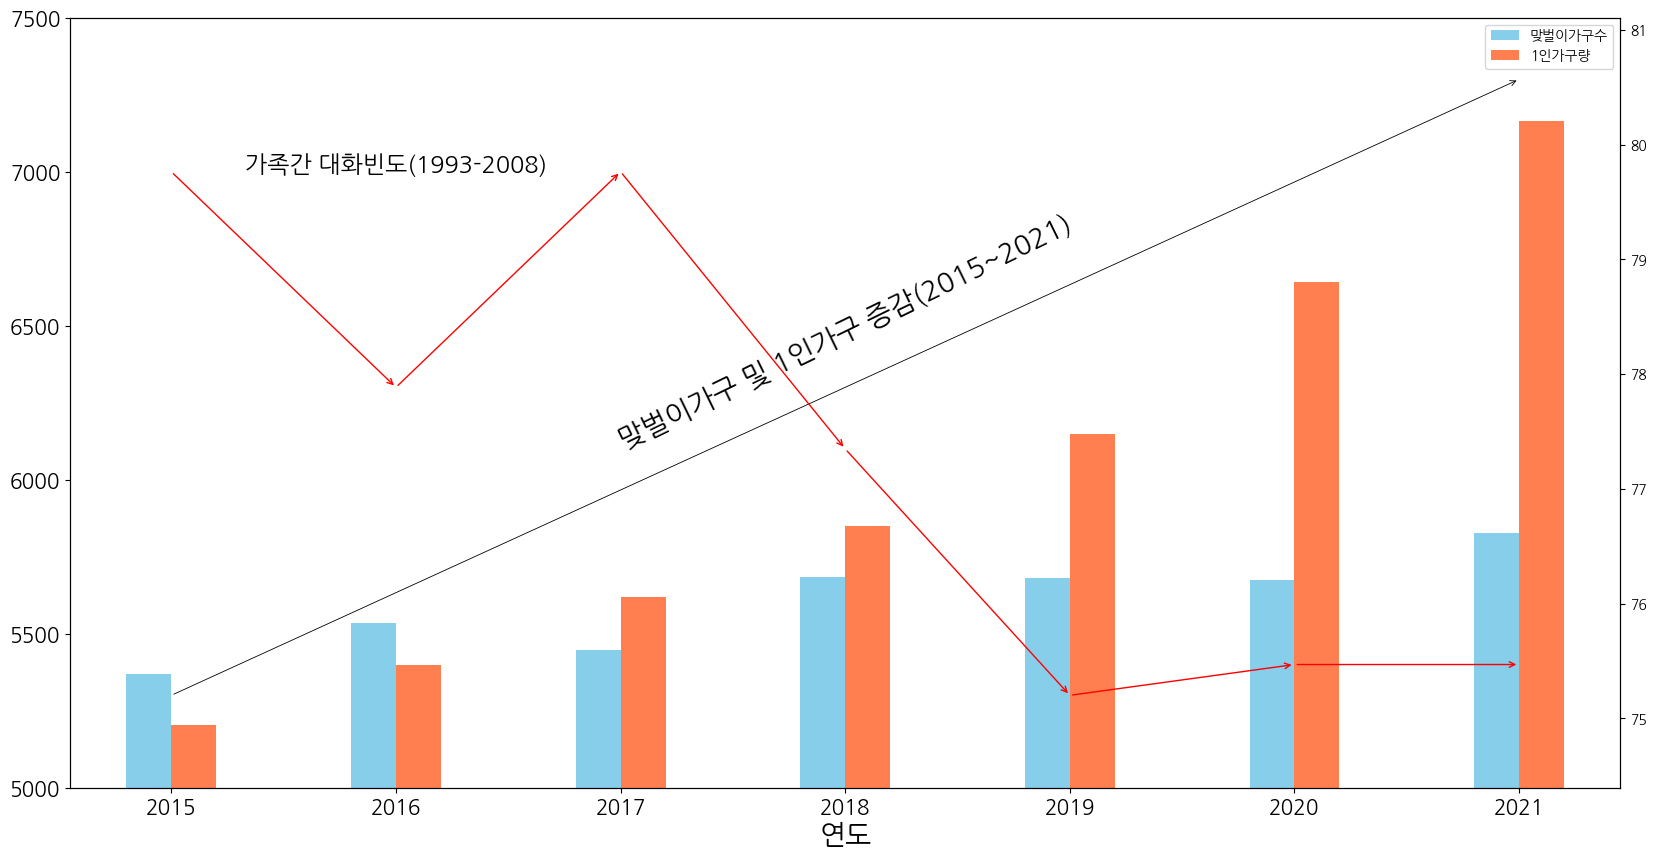

In [125]:
condft=condf.T
ax1=condft.plot(kind='bar',width=0.4,figsize=(20,10),color=['skyblue','coral'],rot=360,fontsize=15)
# plt.xlabel("연도")
plt.ylim(5000,7500) #y값 범위 지정
plt.annotate("",
             xy=(6,7300), #화살표의 머리부분(끝점)
             xytext=(0,5300), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='black',lw=0.6)
             )
plt.annotate("맞벌이가구 및 1인가구 증감(2015~2021)",
             xy=(3,6100), #텍스트 위치 기준점
             rotation=26,
             va='baseline',
             ha='center',
             fontsize=20,                         
             )
plt.annotate("",
             xy=(1,6300), #화살표의 머리부분(끝점)
             xytext=(0,7000), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(2,7000), #화살표의 머리부분(끝점)
             xytext=(1,6300), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(3,6100), #화살표의 머리부분(끝점)
             xytext=(2,7000), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(4,5300), #화살표의 머리부분(끝점)
             xytext=(3,6100), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(5,5400), #화살표의 머리부분(끝점)
             xytext=(4,5300), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(6,5400), #화살표의 머리부분(끝점)
             xytext=(5,5400), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("가족간 대화빈도(1993-2008)",
             xy=(1,7000), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=17,                         
             )
ax2=ax1.twinx()
# # pisa=pisa.T
ax2.plot(talkdf,color='red',label='학업성취 읽기능력')

# plt.ylim(510,540)
ax1.set_xlabel("연도",size=20)
# ax1.set_ylabel("가구수")
plt.show()


In [43]:
pisa.index

Index(['대한민국'], dtype='object')

In [44]:
# pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
# pisa #2015년,2018년만 필요하므로 2012년은 지우자
# pisa.drop(2012,axis=1,inplace=True)
# pisat=

In [45]:
pisa=fontda.pisa()
pisa.rename(columns={2012:2015,2015:2017,2018:2019},inplace=True)
pisa #주어진 2012년부터 2018년까지 데이터를 그래프에 표현하기위해 편의상 2015년으로 변경하였다.

,2015,2017,2019
대한민국,536.5,518.5,514.5


In [46]:
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도


,2014,2017
문해능력수준별,,
수준1,70.4,75.7
수준2,73.3,75.7
수준3,79.7,81.6
수준4 이상,85.2,87.2


Text(0.5, 1.0, '문해능력 수준별 생활만족도 그래프 [2014년,2017년]')

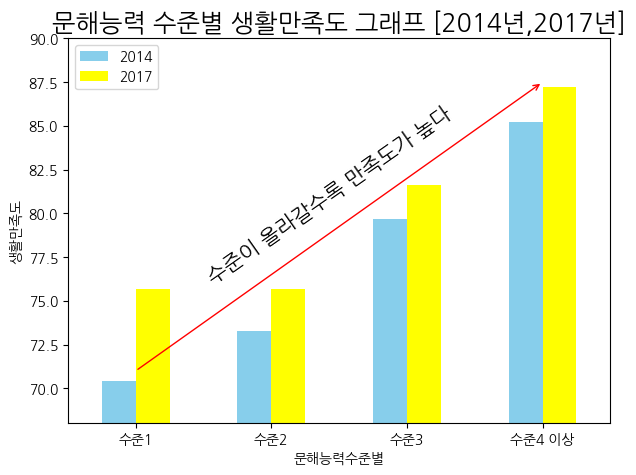

In [47]:
# so['2014'].plot(kind="bar",figsize=(7,5))
so.plot(kind="bar",figsize=(7,5),color=['skyblue','yellow'],rot=360)
plt.ylim(68,90)
plt.ylabel("생활만족도")
plt.annotate("",
             xy=(3,87.5), #화살표의 머리부분(끝점)
             xytext=(0,71), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("수준이 올라갈수록 만족도가 높다",
             xy=(0.5,76), #텍스트 위치 기준점
             rotation=35,
             va='baseline',
            #  ha='bottom',
             fontsize=15,                         
             )
plt.title("문해능력 수준별 생활만족도 그래프 [2014년,2017년]",size=18)


In [48]:
so=pd.read_excel("사회인식.xlsx")
so

,문해능력수준별,2014,2014.1,2017,2017.1
0,문해능력수준별(1),생활만족도 (%),정치관심도 (%),생활만족도 (%),정치관심도 (%)
1,수준1,70.4,21,75.7,31
2,수준2,73.3,38.9,75.7,36.4
3,수준3,79.7,45.6,81.6,51.1
4,수준4 이상,85.2,48.9,87.2,52.3


In [49]:
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도

,2014,2017
문해능력수준별,,
수준1,70.4,75.7
수준2,73.3,75.7
수준3,79.7,81.6
수준4 이상,85.2,87.2


In [50]:
hdf=pd.read_excel('헤모글로빈.xlsx',index_col=0)
hdf
hdf.drop('v11.1',axis=1,inplace=True)
hdf.drop('v10.1',axis=1,inplace=True)
hdf #v1부터 v16 뇌의 위치별 헤모글로빈 활성화.

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
아동 1,1.52,0.72,1.36,0.77,1.04,0.87,0.90,0.82,0.72,1.35,1.19,1.25,1.35,1.03,1.31,-1.05
아동 2,1.08,0.59,0.55,1.58,1.35,0.96,1.66,0.05,1.28,-0.47,1.39,1.72,1.53,-1.39,1.57,-0.91
아동 3,0.27,1.64,1.72,1.05,1.03,-1.41,1.14,0.20,1.86,1.35,2.03,-0.09,1.41,1.70,-0.09,1.51
아동 4,0.92,1.21,0.44,0.65,0.38,0.30,1.16,1.33,0.76,1.90,0.31,0.72,0.67,1.01,-0.87,-1.05
아동 5,0.56,0.01,0.20,0.02,0.03,0.02,0.07,-0.25,-0.55,-0.19,0.27,-0.20,-0.20,0.01,-0.57,-0.01


In [51]:
df=hdf.T
filt=df[['아동 1','아동 2','아동 3','아동 4','아동 5']]<0
df[filt]=0 #마이너스 값은 산소화가 이루어지지않은 정도 이므로 나타낼 필요가 없다. 0으로 변화
df

,아동 1,아동 2,아동 3,아동 4,아동 5
v1,1.52,1.08,0.27,0.92,0.56
v2,0.72,0.59,1.64,1.21,0.01
v3,1.36,0.55,1.72,0.44,0.20
v4,0.77,1.58,1.05,0.65,0.02
v5,1.04,1.35,1.03,0.38,0.03
v6,0.87,0.96,0.00,0.30,0.02
v7,0.90,1.66,1.14,1.16,0.07
v8,0.82,0.05,0.20,1.33,0.00
v9,0.72,1.28,1.86,0.76,0.00
v10,1.35,0.00,1.35,1.90,0.00


In [57]:
finaldf

,child,index,size
0,아동 1,1,1.52
1,아동 1,2,0.72
2,아동 1,3,1.36
3,아동 1,4,0.77
4,아동 1,5,1.04
...,...,...,...
75,아동 5,12,0.00
76,아동 5,13,0.00
77,아동 5,14,0.01
78,아동 5,15,0.00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10740\3903887143.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf = finaldf.append({'child': idx, 'index': col + 1, 'size': value}, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10740\3903887143.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf = finaldf.append({'child': idx, 'index': col + 1, 'size': value}, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10740\3903887143.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf = finaldf.append({'child': idx, 'index': col + 1, 'size': value}, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10740\3903887143.py:8: FutureWarning: T

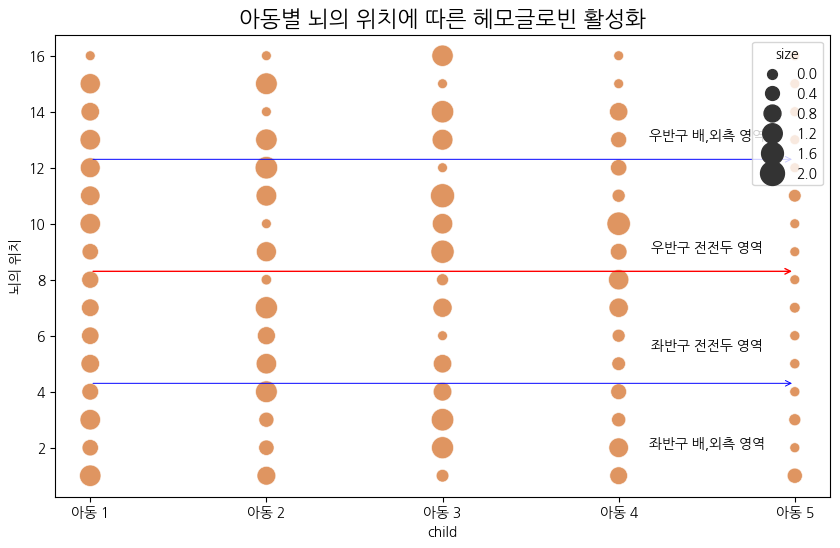

In [53]:
df=df.T
#아동 이름과 데이터 값을 매핑하여 데이터프레임 생성
finaldf= pd.DataFrame(columns=['child', 'index', 'size'])
for idx, row in df.iterrows(): # Pandas 데이터프레임의 각 행을 순환하는 메서드입니다. 
    #df.iterrows()는 (index, row) 튜플을 반환하는 제너레이터(generator)로 사용됩니다. 따라서 반복문을 사용하여 각 행의 인덱스와 데이터에 접근할 수 있습니다.
    for col, value in enumerate(row):
        #df.iterrows()를 통해 반환된 행 데이터(row)를 순회하면서 각 열의 인덱스와 해당 열의 값을 함께 반환하는 내장 함수
        finaldf = finaldf.append({'child': idx, 'index': col + 1, 'size': value}, ignore_index=True)

# Scatter plot 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=finaldf, x='child', y='index', size='size', sizes=(50, 300), alpha=0.7,color='chocolate')
plt.title('아동별 뇌의 위치에 따른 헤모글로빈 활성화', fontsize=16)
plt.ylabel('뇌의 위치')
plt.annotate("",
             xy=(4,4.3), #화살표의 머리부분(끝점)
             xytext=(0,4.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='blue',lw=0.7)
             )
plt.annotate("",
             xy=(4,8.3), #화살표의 머리부분(끝점)
             xytext=(0,8.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(4,12.3), #화살표의 머리부분(끝점)
             xytext=(0,12.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='blue',lw=0.7)
             )
plt.annotate("좌반구 배,외측 영역",
             xy=(3.5,2), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.annotate("좌반구 전전두 영역",
             xy=(3.5,5.5), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
)
plt.annotate("우반구 전전두 영역",
             xy=(3.5,9), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.annotate("우반구 배,외측 영역",
             xy=(3.5,13), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.show()

Text(0.5, 1.0, '읽을때 좌우반구 헤모글로빈 활성화평균')

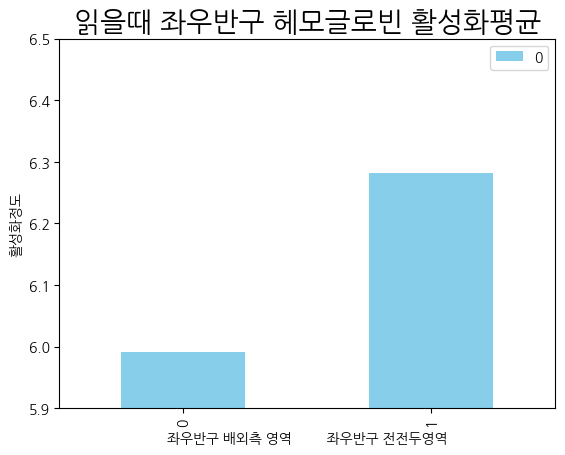

In [54]:
ll=df.iloc[:,0:4].mean()
lc=df.iloc[:,4:8].mean()
rc=df.iloc[:,8:12].mean()
rr=df.iloc[:,12:].mean()
ls=ll.sum()+rr.sum() #좌우 외측 평균값 합계
cs=lc.sum()+rc.sum() #좌우 전전두엽값 합계
lscsdf=pd.DataFrame([ls,cs])
lscsdf
lscsdf.plot(kind='bar',color='skyblue',xlabel="좌우반구 배외측 영역\t\t\t\t\t\t\t\t\t좌우반구 전전두영역",ylabel="활성화정도",fontsize=10)
plt.ylim(5.9,6.5)
plt.title("읽을때 좌우반구 헤모글로빈 활성화평균",size=20)

대상자들이 자료를 읽는 동안 양측 전전두 영역과 

배․외측 영역에서 산소 헤모글로빈의 측정치가 높게 나타난 경향이 있었다.

좌반구의 전전두영역이 우반구보다 높은 수치를 나타났지만, 

흔히들 말과 언어에 대한 우세반구는 좌반구라고 나와있는데 우반구도 활성화 됨을 알 수 있다.

In [55]:
# %load 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fontda
#네이버 트렌드 검색량 추출
serch='검색어.xlsx' #출처 네이버트렌드 검색량 변화 데이터
df=pd.read_excel(serch,header=6,index_col=0)
serchdf=df.iloc[::,0::2]
sumlist=[]
for n in serchdf.index:
    sumlist.append(serchdf.loc[n].sum())
# sumlist
sum2016=int(sum(sumlist[:6])) #2016년 합계 6개월
sum2017=int(sum(sumlist[6:18])) #2017년 합계 1년
sum2018=int(sum(sumlist[18:30])) #2018년 합계
sum2019=int(sum(sumlist[30:42])) #2019년 합계
sum2020=int(sum(sumlist[42:54])) #2020년 합계
sum2021=int(sum(sumlist[54:66])) #2021년 합계
sum2022=int(sum(sumlist[66:78])) #2022년 합계
sum2023=int(sum(sumlist[78:])) #2023년 합계 6개월

# serchdf['금일'].min() #11.89664
# serchdf['명일'].min() #29.73967
# serchdf['심심'].min() #0.81046
# serchdf['연패'].min() #0.61169
# serchdf['금일'].max() #99.13182
# serchdf['명일'].max() #100
# serchdf['심심'].max() #7.0954
# serchdf['연패'].max() #12.37625

minlist=[serchdf['금일'].min(),serchdf['명일'].min(),serchdf['심심'].min(),serchdf['연패'].min()]
maxlist=[serchdf['금일'].max(),serchdf['명일'].max(),serchdf['심심'].max(),serchdf['연패'].max()]
minmaxdf=pd.DataFrame([minlist,maxlist],index=['최소 검색','최대 검색'],columns=['금일','명일','심심','연패'])
print(minmaxdf)

perlist=[]
perlist.append(round(sum2016/sum(sumlist)*100))
perlist.append(round(sum2017/sum(sumlist)*100))
perlist.append(round(sum2018/sum(sumlist)*100))
perlist.append(round(sum2019/sum(sumlist)*100))
perlist.append(round(sum2020/sum(sumlist)*100))
perlist.append(round(sum2021/sum(sumlist)*100))
perlist.append(round(sum2022/sum(sumlist)*100))
perlist.append(round(sum2023/sum(sumlist)*100))

finalsumlist=[sum2016,sum2017,sum2018,sum2019,sum2020,sum2021,sum2022,sum2023]
# finalsumlist
sumperdf=pd.DataFrame([finalsumlist,perlist],columns=list(range(2016,2024)),index=['검색량합계','퍼센트'])
# sumperdf
sumperdf.loc[' ']="ㅤ"
sumperdf.loc['단어']=['금일','명일','심심','연패','금일','명일','심심','연패']
mx=minlist+maxlist
sumperdf.loc['최소/최대']=mx
total=0
for n in finalsumlist:
    total+=n
finalmean=total/len(finalsumlist)
pertotal=0
for n in perlist:
    pertotal+=n
permean=pertotal/len(perlist)
finalmeanlist=[finalmean,permean," "," "," "]
sumperdf['평균값']=finalmeanlist
sumperdf
# sumperdf.drop('평균값',axis=1,inplace=True)
sumperdf.drop([' ', '최소/최대'],inplace=True)
serch=sumperdf.iloc[0]
serch
serch.plot(kind='bar',rot=360,xlabel="연도",ylabel="수치",fontsize=15,color='green')
plt.title("금일/명일/심심/연패 네이버 검색량",size=20)
plt.xlabel("연도(year)",size=15)
plt.ylabel("수치량",size=15)
workdouble='맞벌이.xlsx' #출처 KOSIS 노동탭 년도별맞벌이가구
workdf=pd.read_excel(workdouble,index_col=0)
doublelist=list(workdf.loc['계'][1::5]) #2015년부터 2022년
# doublelist
gender='젠더갈등.xlsx'
genderdf=pd.read_excel(gender,header=3,index_col=0)
genderdf=genderdf.iloc[:-1].T
genderdf.plot(kind="bar",rot=360,xlabel=" ")
genderdf
gendermeanlist=[]
genderminlist=[]
# for n in genderdf.index:
#     gendermeanlist.append(genderdf.loc[n].mean())
#     genderminlist.append(genderdf.loc[n].min())
for n in range(0,4):
    gendermeanlist.append(genderdf.iloc[n].mean())
    genderminlist.append(genderdf.iloc[n].min())

genderdf.loc[' ']="ㅤ"
genderdf.loc['연도']=list(range(2015,2023))
genderdf.loc['맞벌이가구수(천)']=doublelist
index2013='2015년대비증감률'
indexlist=[]
for n in doublelist:    
    indexlist.append(n-doublelist[0])
indextotal=0
for n in indexlist:
    indextotal+=n
indexmean=indextotal/len(indexlist)
# indexlist
genderdf.loc[index2013]=indexlist
# genderdf.loc['  ']="ㅤ"
#1인가구를해보자
gagu1='1인가구.xlsx'  #출처 KOSIS 인구탭 년도별 1인가구
gagudf=pd.read_excel(gagu1,index_col=0)
gagudf.iloc[1,1::3]
gagulist=list(gagudf.iloc[1,1::3])
gagulist.append(int(gagudf.iloc[1,1::3].mean()))
gagulist #평균값까지 추가.
gaguyearlist=list(range(2015,2022))
gaguyearlist.append("평균값")
# genderdf
# gaguyearlist
# gagulist
genderdf.loc[' ㅤ  ']="ㅤㅤ "
genderdf.loc['1인가구연도']=gaguyearlist
genderdf.loc['1인가구량']=gagulist

genderdfmean=[] #젠더갈등 평균값 열에다가 추가
genderdfmean.append(int(genderdf.iloc[0].mean()))
genderdfmean.append(int(genderdf.iloc[1].mean()))
genderdfmean.append(int(genderdf.iloc[2].mean()))
genderdfmean.append(int(genderdf.iloc[3].mean()))
genderdfmean.append(" ")
genderdfmean.append("평균값")
workdfmean=int(workdf.loc['계'][1::5].mean()) #맞벌이가구 평균값도 추가.
genderdfmean.append(workdfmean)
genderdfmean.append(int(indexmean))
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdf["평균값"]=genderdfmean
genderdf
#가족간 대화 도출
genderdf.loc[' ㅤ ㅤㅤ']="ㅤㅤ"
talkfile='가족간대화.xlsx' #kosis 월평균 가족간대화횟수 지역통계탭 경상남도
#거의매일, 자주, 가끔씩, 필요한경우에만, 거의없음, 모이기도힘듬
talkdf=pd.read_excel(talkfile, index_col=0)
talkdf.iloc[1]
talklist=[]
talklist.append(talkdf.iloc[1][0:4].sum()) #1993
talklist.append(talkdf.iloc[1][6:10].sum()) #1996
talklist.append(talkdf.iloc[1][12:16].sum()) #1999
talklist.append(talkdf.iloc[1][18:22].sum()) #2002
talklist.append(talkdf.iloc[1][24:28].sum()) #2005
talklist.append(talkdf.iloc[1][30:34].sum()) #2008
# talklist
talktotal=0
for n in talklist:
    talktotal+=n
talkmean=talktotal/len(talklist)
talklist.append(" ")
talklist.append(" ")
talklist.append(talkmean)
# talklist
talkyearlist=list(range(1993,2009,3))
talkyearlist.append(" ")
talkyearlist.append(" ")
talkyearlist.append("평균값")
# talkyearlist
genderdf.loc["대화연도"]=talkyearlist
genderdf.loc["가족간대화빈도"]=talklist #거의매일,자주,가끔씩,필요한경우에만 이것만 더함. 거의없음 모이기도힘듬은 제외
genderdf
talklist=[80.8, 76.6, 80.0, 77.1, 74.7, 75.8]
talkyearlist=[1993, 1996, 1999, 2002, 2005, 2008]
talkdf=pd.DataFrame(talkyearlist)
talkdf['대화빈도']=talklist
talkdf.rename(columns={0:'연도'},inplace=True)
talkdf=talkdf.set_index('연도')
talkdf=talkdf.T #가족간 대화빈도 데이터프레임.
talkdf
gaguyear=list(range(2015,2022))
del gagulist[-1]
pp=pd.DataFrame(gagulist,gaguyear)
gagudf=pp.T
gagudf.rename(index={0:'1인가구량'},inplace=True)
gagudf #1인가구 데이터프레임.
doubleyear=gaguyear
del doublelist[-1]
pp=pd.DataFrame(doublelist,doubleyear)
doubledf=pp.T
doubledf.rename(index={0:'맞벌이가구수'},inplace=True)
doubledf #맞벌이가구 데이터 프레임
condf=pd.concat([doubledf,gagudf/1000]) #맞벌이 가구수 + 1인가구량 데이터프레임 합치기. 
#같이 그래프를 그리기 위해 가구량을 1000으로 나눠 단위를 맞췄다.
condf
pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
pisa #2015년,2018년만 필요하므로 2012년은 지우자
pisa.drop(2012,axis=1,inplace=True)
pisa
condft=condf.T
ax1=condft.plot(kind='bar',width=0.4,figsize=(20,10),color=['skyblue','coral'],rot=360,fontsize=15)
# plt.xlabel("연도")
plt.ylim(5000,7500) #y값 범위 지정
plt.annotate("",
             xy=(6,7300), #화살표의 머리부분(끝점)
             xytext=(0,5300), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='yellow',lw=3.4)
             )
plt.annotate("맞벌이가구 및 1인가구 증감(2015~2021)",
             xy=(3,6100), #텍스트 위치 기준점
             rotation=26,
             va='baseline',
             ha='center',
             fontsize=20,                         
             )
# ax2=ax1.twinx()
# # pisa=pisa.T
# ax2.plot(pisa.index,pisa.values,color='red',label='학업성취 읽기능력')
# plt.ylim(510,540)
ax1.set_xlabel("연도",size=20)
# ax1.set_ylabel("가구수")
plt.show()
pisa.index
# pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
# pisa #2015년,2018년만 필요하므로 2012년은 지우자
# pisa.drop(2012,axis=1,inplace=True)
# pisat=
pisa=fontda.pisa()
pisa.rename(columns={2012:2015,2015:2017,2018:2019},inplace=True)
pisa #주어진 2012년부터 2018년까지 데이터를 그래프에 표현하기위해 편의상 2015년으로 변경하였다.
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도
# so['2014'].plot(kind="bar",figsize=(7,5))
so.plot(kind="bar",figsize=(7,5),color=['skyblue','yellow'],rot=360)
plt.ylim(68,90)
plt.ylabel("생활만족도")
plt.annotate("",
             xy=(3,87.5), #화살표의 머리부분(끝점)
             xytext=(0,71), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("수준이 올라갈수록 만족도가 높다",
             xy=(0.5,76), #텍스트 위치 기준점
             rotation=35,
             va='baseline',
            #  ha='bottom',
             fontsize=15,                         
             )
plt.title("문해능력 수준별 생활만족도 그래프 [2014년,2017년]",size=18)
so=pd.read_excel("사회인식.xlsx")
so
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도
hdf=pd.read_excel('헤모글로빈.xlsx',index_col=0)
hdf
hdf.drop('v11.1',axis=1,inplace=True)
hdf.drop('v10.1',axis=1,inplace=True)
hdf #v1부터 v16 뇌의 위치별 헤모글로빈 활성화.
df=hdf.T
filt=df[['아동 1','아동 2','아동 3','아동 4','아동 5']]<0
df[filt]=0 #마이너스 값은 산소화가 이루어지지않은 정도 이므로 나타낼 필요가 없다. 0으로 변화
df
finaldf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fontda
#네이버 트렌드 검색량 추출
serch='검색어.xlsx' #출처 네이버트렌드 검색량 변화 데이터
df=pd.read_excel(serch,header=6,index_col=0)
serchdf=df.iloc[::,0::2]
sumlist=[]
for n in serchdf.index:
    sumlist.append(serchdf.loc[n].sum())
# sumlist
sum2016=int(sum(sumlist[:6])) #2016년 합계 6개월
sum2017=int(sum(sumlist[6:18])) #2017년 합계 1년
sum2018=int(sum(sumlist[18:30])) #2018년 합계
sum2019=int(sum(sumlist[30:42])) #2019년 합계
sum2020=int(sum(sumlist[42:54])) #2020년 합계
sum2021=int(sum(sumlist[54:66])) #2021년 합계
sum2022=int(sum(sumlist[66:78])) #2022년 합계
sum2023=int(sum(sumlist[78:])) #2023년 합계 6개월

# serchdf['금일'].min() #11.89664
# serchdf['명일'].min() #29.73967
# serchdf['심심'].min() #0.81046
# serchdf['연패'].min() #0.61169
# serchdf['금일'].max() #99.13182
# serchdf['명일'].max() #100
# serchdf['심심'].max() #7.0954
# serchdf['연패'].max() #12.37625

minlist=[serchdf['금일'].min(),serchdf['명일'].min(),serchdf['심심'].min(),serchdf['연패'].min()]
maxlist=[serchdf['금일'].max(),serchdf['명일'].max(),serchdf['심심'].max(),serchdf['연패'].max()]
minmaxdf=pd.DataFrame([minlist,maxlist],index=['최소 검색','최대 검색'],columns=['금일','명일','심심','연패'])
print(minmaxdf)

perlist=[]
perlist.append(round(sum2016/sum(sumlist)*100))
perlist.append(round(sum2017/sum(sumlist)*100))
perlist.append(round(sum2018/sum(sumlist)*100))
perlist.append(round(sum2019/sum(sumlist)*100))
perlist.append(round(sum2020/sum(sumlist)*100))
perlist.append(round(sum2021/sum(sumlist)*100))
perlist.append(round(sum2022/sum(sumlist)*100))
perlist.append(round(sum2023/sum(sumlist)*100))

finalsumlist=[sum2016,sum2017,sum2018,sum2019,sum2020,sum2021,sum2022,sum2023]
# finalsumlist
sumperdf=pd.DataFrame([finalsumlist,perlist],columns=list(range(2016,2024)),index=['검색량합계','퍼센트'])
# sumperdf
sumperdf.loc[' ']="ㅤ"
sumperdf.loc['단어']=['금일','명일','심심','연패','금일','명일','심심','연패']
mx=minlist+maxlist
sumperdf.loc['최소/최대']=mx
total=0
for n in finalsumlist:
    total+=n
finalmean=total/len(finalsumlist)
pertotal=0
for n in perlist:
    pertotal+=n
permean=pertotal/len(perlist)
finalmeanlist=[finalmean,permean," "," "," "]
sumperdf['평균값']=finalmeanlist
sumperdf
# sumperdf.drop('평균값',axis=1,inplace=True)
sumperdf.drop([' ', '최소/최대'],inplace=True)
serch=sumperdf.iloc[0]
serch
serch.plot(kind='bar',rot=360,xlabel="연도",ylabel="수치",fontsize=15,color='green')
plt.title("금일/명일/심심/연패 네이버 검색량",size=20)
plt.xlabel("연도(year)",size=15)
plt.ylabel("수치량",size=15)
workdouble='맞벌이.xlsx' #출처 KOSIS 노동탭 년도별맞벌이가구
workdf=pd.read_excel(workdouble,index_col=0)
doublelist=list(workdf.loc['계'][1::5]) #2015년부터 2022년
# doublelist
gender='젠더갈등.xlsx'
genderdf=pd.read_excel(gender,header=3,index_col=0)
genderdf=genderdf.iloc[:-1].T
genderdf.plot(kind="bar",rot=360,xlabel=" ")
genderdf
gendermeanlist=[]
genderminlist=[]
# for n in genderdf.index:
#     gendermeanlist.append(genderdf.loc[n].mean())
#     genderminlist.append(genderdf.loc[n].min())
for n in range(0,4):
    gendermeanlist.append(genderdf.iloc[n].mean())
    genderminlist.append(genderdf.iloc[n].min())

genderdf.loc[' ']="ㅤ"
genderdf.loc['연도']=list(range(2015,2023))
genderdf.loc['맞벌이가구수(천)']=doublelist
index2013='2015년대비증감률'
indexlist=[]
for n in doublelist:    
    indexlist.append(n-doublelist[0])
indextotal=0
for n in indexlist:
    indextotal+=n
indexmean=indextotal/len(indexlist)
# indexlist
genderdf.loc[index2013]=indexlist
# genderdf.loc['  ']="ㅤ"
#1인가구를해보자
gagu1='1인가구.xlsx'  #출처 KOSIS 인구탭 년도별 1인가구
gagudf=pd.read_excel(gagu1,index_col=0)
gagudf.iloc[1,1::3]
gagulist=list(gagudf.iloc[1,1::3])
gagulist.append(int(gagudf.iloc[1,1::3].mean()))
gagulist #평균값까지 추가.
gaguyearlist=list(range(2015,2022))
gaguyearlist.append("평균값")
# genderdf
# gaguyearlist
# gagulist
genderdf.loc[' ㅤ  ']="ㅤㅤ "
genderdf.loc['1인가구연도']=gaguyearlist
genderdf.loc['1인가구량']=gagulist

genderdfmean=[] #젠더갈등 평균값 열에다가 추가
genderdfmean.append(int(genderdf.iloc[0].mean()))
genderdfmean.append(int(genderdf.iloc[1].mean()))
genderdfmean.append(int(genderdf.iloc[2].mean()))
genderdfmean.append(int(genderdf.iloc[3].mean()))
genderdfmean.append(" ")
genderdfmean.append("평균값")
workdfmean=int(workdf.loc['계'][1::5].mean()) #맞벌이가구 평균값도 추가.
genderdfmean.append(workdfmean)
genderdfmean.append(int(indexmean))
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdfmean.append(" ")
genderdf["평균값"]=genderdfmean
genderdf
#가족간 대화 도출
genderdf.loc[' ㅤ ㅤㅤ']="ㅤㅤ"
talkfile='가족간대화.xlsx' #kosis 월평균 가족간대화횟수 지역통계탭 경상남도
#거의매일, 자주, 가끔씩, 필요한경우에만, 거의없음, 모이기도힘듬
talkdf=pd.read_excel(talkfile, index_col=0)
talkdf.iloc[1]
talklist=[]
talklist.append(talkdf.iloc[1][0:4].sum()) #1993
talklist.append(talkdf.iloc[1][6:10].sum()) #1996
talklist.append(talkdf.iloc[1][12:16].sum()) #1999
talklist.append(talkdf.iloc[1][18:22].sum()) #2002
talklist.append(talkdf.iloc[1][24:28].sum()) #2005
talklist.append(talkdf.iloc[1][30:34].sum()) #2008
# talklist
talktotal=0
for n in talklist:
    talktotal+=n
talkmean=talktotal/len(talklist)
talklist.append(" ")
talklist.append(" ")
talklist.append(talkmean)
# talklist
talkyearlist=list(range(1993,2009,3))
talkyearlist.append(" ")
talkyearlist.append(" ")
talkyearlist.append("평균값")
# talkyearlist
genderdf.loc["대화연도"]=talkyearlist
genderdf.loc["가족간대화빈도"]=talklist #거의매일,자주,가끔씩,필요한경우에만 이것만 더함. 거의없음 모이기도힘듬은 제외
genderdf
talklist=[80.8, 76.6, 80.0, 77.1, 74.7, 75.8]
talkyearlist=[1993, 1996, 1999, 2002, 2005, 2008]
talkdf=pd.DataFrame(talkyearlist)
talkdf['대화빈도']=talklist
talkdf.rename(columns={0:'연도'},inplace=True)
talkdf=talkdf.set_index('연도')
talkdf=talkdf.T #가족간 대화빈도 데이터프레임.
talkdf
gaguyear=list(range(2015,2022))
del gagulist[-1]
pp=pd.DataFrame(gagulist,gaguyear)
gagudf=pp.T
gagudf.rename(index={0:'1인가구량'},inplace=True)
gagudf #1인가구 데이터프레임.
doubleyear=gaguyear
del doublelist[-1]
pp=pd.DataFrame(doublelist,doubleyear)
doubledf=pp.T
doubledf.rename(index={0:'맞벌이가구수'},inplace=True)
doubledf #맞벌이가구 데이터 프레임
condf=pd.concat([doubledf,gagudf/1000]) #맞벌이 가구수 + 1인가구량 데이터프레임 합치기. 
#같이 그래프를 그리기 위해 가구량을 1000으로 나눠 단위를 맞췄다.
condf
pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
pisa #2015년,2018년만 필요하므로 2012년은 지우자
pisa.drop(2012,axis=1,inplace=True)
pisa
condft=condf.T
ax1=condft.plot(kind='bar',width=0.4,figsize=(20,10),color=['skyblue','coral'],rot=360,fontsize=15)
# plt.xlabel("연도")
plt.ylim(5000,7500) #y값 범위 지정
plt.annotate("",
             xy=(6,7300), #화살표의 머리부분(끝점)
             xytext=(0,5300), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='yellow',lw=3.4)
             )
plt.annotate("맞벌이가구 및 1인가구 증감(2015~2021)",
             xy=(3,6100), #텍스트 위치 기준점
             rotation=26,
             va='baseline',
             ha='center',
             fontsize=20,                         
             )
# ax2=ax1.twinx()
# # pisa=pisa.T
# ax2.plot(pisa.index,pisa.values,color='red',label='학업성취 읽기능력')
# plt.ylim(510,540)
ax1.set_xlabel("연도",size=20)
# ax1.set_ylabel("가구수")
plt.show()
pisa.index
# pisa=fontda.pisa() #모듈에서 학업성취도 평가를 불러오기
# pisa #2015년,2018년만 필요하므로 2012년은 지우자
# pisa.drop(2012,axis=1,inplace=True)
# pisat=
pisa=fontda.pisa()
pisa.rename(columns={2012:2015,2015:2017,2018:2019},inplace=True)
pisa #주어진 2012년부터 2018년까지 데이터를 그래프에 표현하기위해 편의상 2015년으로 변경하였다.
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도
# so['2014'].plot(kind="bar",figsize=(7,5))
so.plot(kind="bar",figsize=(7,5),color=['skyblue','yellow'],rot=360)
plt.ylim(68,90)
plt.ylabel("생활만족도")
plt.annotate("",
             xy=(3,87.5), #화살표의 머리부분(끝점)
             xytext=(0,71), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("수준이 올라갈수록 만족도가 높다",
             xy=(0.5,76), #텍스트 위치 기준점
             rotation=35,
             va='baseline',
            #  ha='bottom',
             fontsize=15,                         
             )
plt.title("문해능력 수준별 생활만족도 그래프 [2014년,2017년]",size=18)
so=pd.read_excel("사회인식.xlsx")
so
so=pd.read_excel("사회인식.xlsx")
so.set_index("문해능력수준별",inplace=True)
so.drop("문해능력수준별(1)",axis=0,inplace=True)
so.drop(["2014.1","2017.1"],axis=1,inplace=True) 
so #문해능력 수준에 따른 생활만족도
hdf=pd.read_excel('헤모글로빈.xlsx',index_col=0)
hdf
hdf.drop('v11.1',axis=1,inplace=True)
hdf.drop('v10.1',axis=1,inplace=True)
hdf #v1부터 v16 뇌의 위치별 헤모글로빈 활성화.
df=hdf.T
filt=df[['아동 1','아동 2','아동 3','아동 4','아동 5']]<0
df[filt]=0 #마이너스 값은 산소화가 이루어지지않은 정도 이므로 나타낼 필요가 없다. 0으로 변화
df
# finaldf
df=df.T
#아동 이름과 데이터 값을 매핑하여 데이터프레임 생성
finaldf= pd.DataFrame(columns=['child', 'index', 'size'])
for idx, row in df.iterrows(): # Pandas 데이터프레임의 각 행을 순환하는 메서드입니다. 
    #df.iterrows()는 (index, row) 튜플을 반환하는 제너레이터(generator)로 사용됩니다. 따라서 반복문을 사용하여 각 행의 인덱스와 데이터에 접근할 수 있습니다.
    for col, value in enumerate(row):
        #df.iterrows()를 통해 반환된 행 데이터(row)를 순회하면서 각 열의 인덱스와 해당 열의 값을 함께 반환하는 내장 함수
        finaldf = finaldf.append({'child': idx, 'index': col + 1, 'size': value}, ignore_index=True)

# Scatter plot 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=finaldf, x='child', y='index', size='size', sizes=(50, 300), alpha=0.7,color='chocolate')
plt.title('아동별 뇌의 위치에 따른 헤모글로빈 활성화', fontsize=16)
plt.ylabel('뇌의 위치')
plt.annotate("",
             xy=(4,4.3), #화살표의 머리부분(끝점)
             xytext=(0,4.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='blue',lw=0.7)
             )
plt.annotate("",
             xy=(4,8.3), #화살표의 머리부분(끝점)
             xytext=(0,8.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='red',lw=1)
             )
plt.annotate("",
             xy=(4,12.3), #화살표의 머리부분(끝점)
             xytext=(0,12.3), #화살표의 꼬리부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->',color='blue',lw=0.7)
             )
plt.annotate("좌반구 배,외측 영역",
             xy=(3.5,2), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.annotate("좌반구 전전두 영역",
             xy=(3.5,5.5), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
)
plt.annotate("우반구 전전두 영역",
             xy=(3.5,9), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.annotate("우반구 배,외측 영역",
             xy=(3.5,13), #텍스트 위치 기준점
             rotation=0,
             va='baseline',
             ha='center',
             fontsize=10,                         
             )
plt.show()
ll=df.iloc[:,0:4].mean()
lc=df.iloc[:,4:8].mean()
rc=df.iloc[:,8:12].mean()
rr=df.iloc[:,12:].mean()
ls=ll.sum()+rr.sum() #좌우 외측 평균값 합계
cs=lc.sum()+rc.sum() #좌우 전전두엽값 합계
lscsdf=pd.DataFrame([ls,cs])
lscsdf
lscsdf.plot(kind='bar',color='skyblue',xlabel="좌우반구 배외측 영역\t\t\t\t\t\t\t\t\t좌우반구 전전두영역",ylabel="활성화정도",fontsize=10)
plt.ylim(5.9,6.5)
plt.title("읽을때 좌우반구 헤모글로빈 활성화평균",size=20)

In [56]:
finaldf.to_excel('data.xlsx', index=False)

In [58]:
df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
아동 1,1.52,0.72,1.36,0.77,1.04,0.87,0.90,0.82,0.72,1.35,1.19,1.25,1.35,1.03,1.31,0.00
아동 2,1.08,0.59,0.55,1.58,1.35,0.96,1.66,0.05,1.28,0.00,1.39,1.72,1.53,0.00,1.57,0.00
아동 3,0.27,1.64,1.72,1.05,1.03,0.00,1.14,0.20,1.86,1.35,2.03,0.00,1.41,1.70,0.00,1.51
아동 4,0.92,1.21,0.44,0.65,0.38,0.30,1.16,1.33,0.76,1.90,0.31,0.72,0.67,1.01,0.00,0.00
아동 5,0.56,0.01,0.20,0.02,0.03,0.02,0.07,0.00,0.00,0.00,0.27,0.00,0.00,0.01,0.00,0.00


In [59]:
agedf=pd.read_excel("연령문해력점수.xlsx")

c:\Users\Administrator\anaconda3\envs\my_python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [62]:
agedf.drop("연령별(1)",axis=1,inplace=True)
agedf.set_index("연령별(2)",inplace=True)

In [69]:
agedf.drop()

,2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7
연령별(2),,,,,,,,
연령별(2),총점,총점,A파트점수,A파트점수,B파트점수,B파트점수,C파트점수,C파트점수
연령별(2),평균 (점),표준편차,평균 (점),표준편차,평균 (점),표준편차,평균 (점),표준편차
소계,77.3,29.3,6.7,1.2,40.6,12.8,30,17.4
19-29세,89.3,15.1,7,0.1,45.6,3.7,36.8,12
30-39세,89.5,16.2,7,0,45.4,4,37.2,12.7
40-49세,86.2,19,7,0.2,44.7,5.4,34.6,14.2
50-59세,77.8,25.8,6.9,0.6,41.9,9.7,29,17.1
60-69세,61,32.7,6.5,1.5,35.1,15.6,19.4,18.2
70-79세,36.6,35.1,5.4,2.4,21.4,19.6,9.9,15.8


In [73]:
col_cu=['2014','2014.2','2014.4','2014.6']
agedf=agedf[col_cu] #열순서 바꾸기. 필요한 열만 추려서 다시 저장.
agedf.drop("18-59세",axis=0,inplace=True)
agedf.drop("60세 이상",axis=0,inplace=True)

In [74]:
agedf

,2014,2014.2,2014.4,2014.6
연령별(2),,,,
연령별(2),총점,A파트점수,B파트점수,C파트점수
연령별(2),평균 (점),평균 (점),평균 (점),평균 (점)
소계,77.3,6.7,40.6,30
19-29세,89.3,7,45.6,36.8
30-39세,89.5,7,45.4,37.2
40-49세,86.2,7,44.7,34.6
50-59세,77.8,6.9,41.9,29
60-69세,61,6.5,35.1,19.4
70-79세,36.6,5.4,21.4,9.9


In [75]:
sns.violinplot(x='2014',y='2014.2',hue='2014.4',data=agedf)

TypeError: Neither the `x` nor `y` variable appears to be numeric.